In [169]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [2]:
# cs4pc_200_train=np.load('/home/hkhachatrian/mae/annotations/cs4pc_200_train.npy', allow_pickle=True)
cs4pc_200_train = np.load('/home/hkhachatrian/mae/annotations/vis_drone_200_train_patch_16.npy', allow_pickle=True)

In [3]:
len(cs4pc_200_train.item()['images'])

3780

In [4]:
cropped_images = cs4pc_200_train.item()['images']

In [5]:
cropped_images[0]['file_name'], cropped_images[1]['file_name']

('/mnt/lwll/lwll-coral/hrant/vis_drone_200/train/9999998_00294_d_0000247.200_0_0.jpg',
 '/mnt/lwll/lwll-coral/hrant/vis_drone_200/train/9999998_00294_d_0000247.200_0_1.jpg')

In [313]:
cropped_images[0]

{'file_name': '/mnt/lwll/lwll-coral/hrant/vis_drone_200/train/9999998_00294_d_0000247.200_0_0.jpg',
 'height': 200,
 'width': 200,
 'id': 0,
 'black_image': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'patch_labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0,

In [6]:
cropped_images[0].keys()

dict_keys(['file_name', 'height', 'width', 'id', 'black_image', 'patch_labels'])

In [7]:
cropped_images[0]['file_name']

'/mnt/lwll/lwll-coral/hrant/vis_drone_200/train/9999998_00294_d_0000247.200_0_0.jpg'

In [8]:
'/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_011655_leftImg8bit.png'

'/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_011655_leftImg8bit.png'

In [9]:
'/lwll/development/vis_drone/vis_drone_full/train/'

'/lwll/development/vis_drone/vis_drone_full/train/'

In [10]:
cropped_images[0]['file_name'].split('/')[-1].split('_')[0]

'9999998'

In [223]:
test = np.load( '/home/hkhachatrian/mae/annotations/' + name, allow_pickle=True).item()['images']

test

[{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_011655_leftImg8bit.png',
  'height': 1024,
  'width': 2048,
  'id': 0,
  'black_image': array([[20., 20., 20., ..., 20., 20., 20.],
         [20., 20., 20., ..., 20., 20., 20.],
         [20., 20., 20., ..., 20., 20., 20.],
         ...,
         [20., 20., 20., ..., 20., 20., 20.],
         [20., 20., 20., ..., 20., 20., 20.],
         [20., 20., 20., ..., 20., 20., 20.]]),
  'patch_labels': array([ 4.,  4.,  4.,  1.,  1.,  1.,  1.,  1.,  4.,  4.,  4.,  4.,  4.,
          4.,  4.,  4.,  4.,  4.,  4.,  1.,  1.,  1.,  4.,  4.,  4.,  4.,
          4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  1.,  4.,  4.,  4.,  4.,
          4.,  4.,  4.,  4.,  7.,  4.,  4.,  4.,  4.,  1.,  4.,  4.,  4.,
          4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
          4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  8.,  9.,  7.,
          4.,  4., 15.,  4.,  4.,  4.,  6.,  4.,  3.,  3.,  3.,  2.,  2.,
    

In [224]:
len(test)

72

In [360]:
from tqdm import tqdm

In [361]:
def main(ann_root, cropped_npy, complete_npy):
    reconstructed_imgs = []
    path = os.path.join(ann_root, cropped_npy)
    cropped_images = np.load(path, allow_pickle=True).item()['images']
    prev_image_name = cropped_images[0]['file_name'].split('/')[-1].split('.')[0]
    save_json = []
    complete_imgs_path = os.path.join(ann_root, complete_npy)
    complete_imgs = np.load(complete_imgs_path, allow_pickle=True).item()['images']
    current_image = np.zeros([1500, 2500])
    max_i = max_j = 0

    for img in tqdm(cropped_images[:], total=len(cropped_images)):
        image_name = img['file_name'].split('/')[-1].split('.')[0]
        indices = img['file_name'].split('/')[-1].split('.')[1].split('_')[:]
        split_size, i, j = [int(indices[0]), int(indices[1]), int(indices[2])]

        if image_name != prev_image_name:
            
            prev_img_info = [x for x in complete_imgs if prev_image_name in x['file_name']][0]
            w, h = prev_img_info['width'], prev_img_info['height']

            current_image = current_image[:h, :w]
            tmp_dct = {
                'file_name': prev_img_info['file_name'],
                'id': prev_img_info['id'], 
                'patch_labels': current_image,
                'resized_img': cv2.resize(prev_img_info['patch_labels'].reshape(14, 14), (w, h), interpolation=cv2.INTER_NEAREST_EXACT),
                # 'resized_img_from_cropped': cv2.resize(current_image, (w, h), interpolation=cv2.INTER_NEAREST_EXACT),
                'black_image': prev_img_info['black_image'],
                'patch_labels_14x14': prev_img_info['patch_labels'].reshape(14, 14)
            }
            save_json.append(tmp_dct)
            reconstructed_imgs.append(current_image)

            max_i = max_j = 0
            current_image = np.zeros((1500, 2500))

        current_image[i * split_size: (i+1) * split_size, j * split_size: (j+1) * split_size] = cv2.resize(img['patch_labels'].reshape(14, 14), (split_size, split_size), interpolation=cv2.INTER_NEAREST_EXACT)
        max_i = max(max_i, i)
        max_j = max(max_j, j)
        prev_image_name = image_name
        
    current_image = current_image[:h, :w]
    prev_img_info = [x for x in complete_imgs if prev_image_name in x['file_name']][0]
    w, h = prev_img_info['width'], prev_img_info['height']

    tmp_dct = {
        'file_name': prev_img_info['file_name'],
        'id': prev_img_info['id'], 
        'patch_labels': current_image,
        'resized_img': cv2.resize(prev_img_info['patch_labels'].reshape(14, 14), (w, h), interpolation=cv2.INTER_NEAREST_EXACT),
        # 'resized_img_from_cropped': cv2.resize(current_image, (w, h), interpolation=cv2.INTER_NEAREST_EXACT),
        'black_image': prev_img_info['black_image'],
        'patch_labels_14x14': prev_img_info['patch_labels'].reshape(14, 14)
    }
    save_json.append(tmp_dct)
    reconstructed_imgs.append(current_image)
    return save_json, reconstructed_imgs
        
name = 'instances_train_new_split_city_scapes_train_inter_internearestexact_patch_16.npy'
json, imgs = main('/home/hkhachatrian/mae/annotations/','cs4pc_200_train.npy', name)

100%|█████████████████████████████████████████████████████████████████████████████| 4752/4752 [00:00<00:00, 4794.00it/s]


In [362]:
len(imgs)

72

In [374]:
a = ['sdgy', 'sgdvb']
a.extend(a)

In [375]:
a

['sdgy', 'sgdvb', 'sdgy', 'sgdvb']

In [363]:
json[idx]['file_name']

'/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_012353_leftImg8bit.png'

In [364]:
imgs[idx].shape

(1024, 2048)

In [367]:
cv2.imread(json[idx]['file_name'])

[ WARN:0@169414.630] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_012353_leftImg8bit.png'): can't open/read file: check file path/integrity


In [365]:
idx = 0

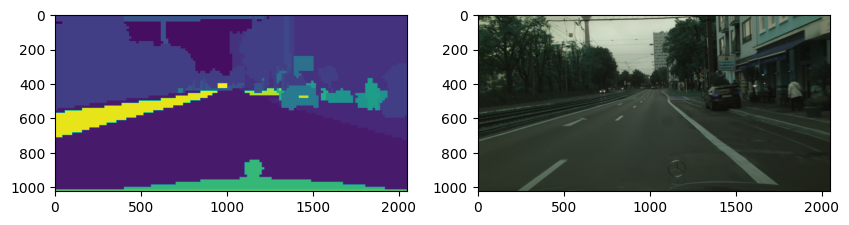

In [373]:
idx += 1
complete_img = cv2.imread(json[idx]['file_name'])

fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
axes[0].imshow(imgs[idx])
axes[1].imshow(complete_img);

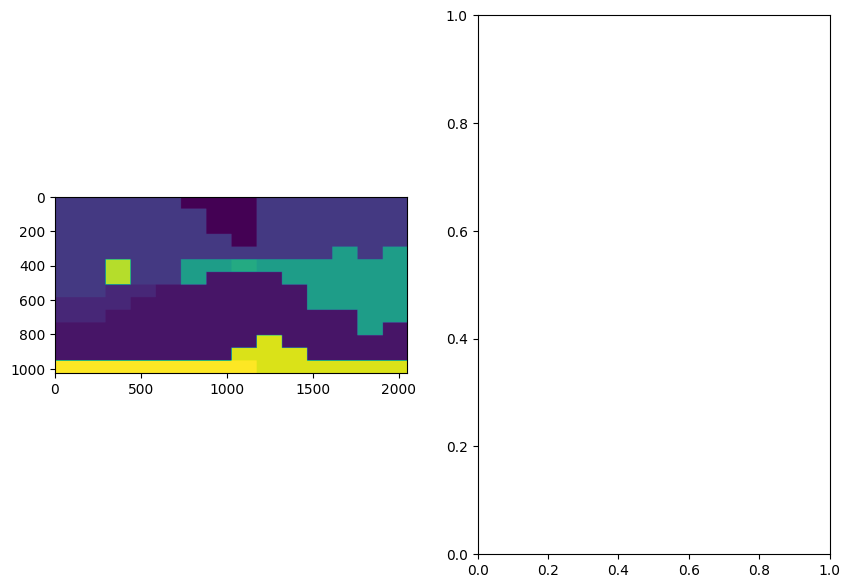

In [370]:
fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
axes[0].imshow(json[idx]['resized_img'])
# axes[1].imshow(json[idx]['resized_img_from_cropped']);

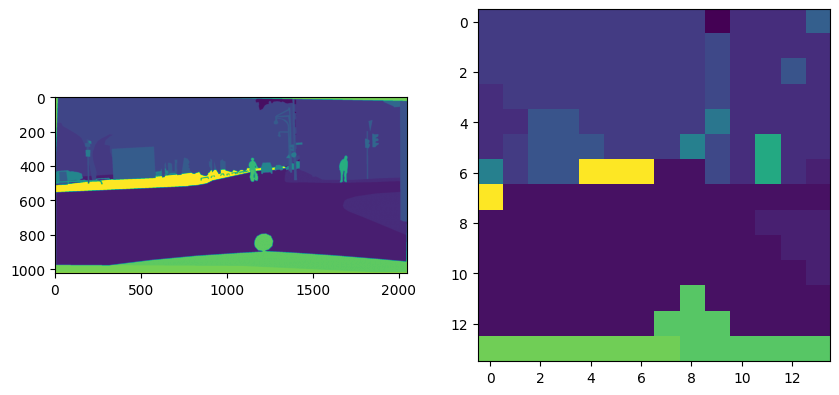

In [372]:
fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
axes[0].imshow(json[idx]['black_image'])
axes[1].imshow(json[idx]['patch_labels_14x14'].reshape(14, 14));

In [301]:
test_img = cv2.resize(json[idx]['patch_labels_14x14'].reshape(14, 14), (2048, 1024))

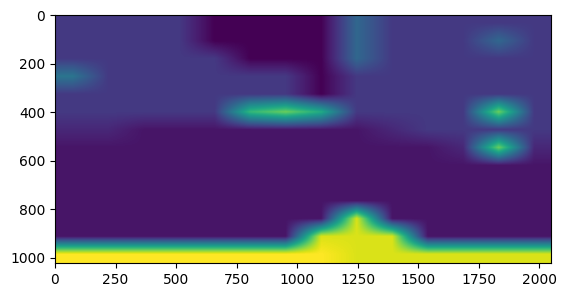

In [303]:
plt.imshow(test_img);

In [312]:
test_img

array([[ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       ...,
       [19., 19., 19., ..., 18., 18., 18.],
       [19., 19., 19., ..., 18., 18., 18.],
       [19., 19., 19., ..., 18., 18., 18.]])

In [242]:
len(imgs)

72

In [11]:
reconstructed_imgs = []
prev_image_name = ''
save_json = []
# root_path = '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/'
root_path = '/lwll/development/vis_drone/vis_drone_full/train/'
# current_image = np.zeros([200, 200])

for img in cropped_images[:]:
#     print(img['file_name'])
    image_name = img['file_name'].split('/')[-1].split('.')[0]
#     print(image_name)
    indices = img['file_name'].split('/')[-1].split('.')[1].split('_')[:]
    split_size, i, j = [int(indices[0]), int(indices[1]), int(indices[2])]
    if image_name != prev_image_name:
        try: 
            current_image = current_image[:max_i * 14, :max_j * 14]
            # print(current_image.shape)
#             parent = prev_image_name.split('_')[0]
            parent = ''
#             print(parent)
            path = os.path.join(root_path, parent, prev_image_name + '.jpg')
            tmp_dct = {
                'file_name': path,
                'id': img['id'], 
                'patch_labels': current_image
            }
            save_json.append(tmp_dct)
            reconstructed_imgs.append(current_image)
        except NameError:
            pass
        except ValueError:
            pass
        max_i = max_j = 0
        current_image = np.zeros((400, 400))
    current_image[i * 14: (i+1) * 14, j * 14: (j+1) * 14] = img['patch_labels'].reshape(14, 14)
    max_i = max(max_i, i)
    max_j = max(max_j, j)
    prev_image_name = image_name


In [12]:
current_image = current_image[:max_i * 14, :max_j * 14]
# print(current_image.shape)
parent = prev_image_name.split('_')[0]
#             parent = ''
#             print(parent)
path = os.path.join(root_path, parent, image_name + '.png')
tmp_dct = {
    'file_name': path,
    'id': img['id'], 
    'patch_labels': current_image
}
save_json.append(tmp_dct)
reconstructed_imgs.append(current_image)

In [13]:
len(reconstructed_imgs)

88

In [270]:
name = 'few_shot_visdrone_vis_drone_train_inter_internearestexact_patch_16.npy'
save_json_1, reconstructed_imgs_1 = main('/home/hkhachatrian/mae/annotations/vis_drone_200_train_patch_16.npy', '/home/hkhachatrian/mae/annotations/' + name)

In [272]:
idx = 0

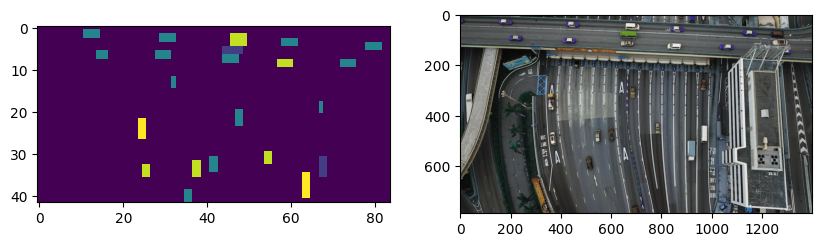

In [279]:
idx += 1
complete_img = cv2.imread(save_json_1[idx]['file_name'])

fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
axes[0].imshow(reconstructed_imgs_1[idx])
axes[1].imshow(complete_img);

In [271]:
len(save_json_1)

88

In [16]:
check_files = []

In [207]:
idx = 0

In [209]:
imgs[idx]

array([], shape=(0, 0), dtype=float64)

In [210]:
imgs

[array([], shape=(0, 0), dtype=float64),
 array([[19.,  6.,  6., ..., 19., 19., 19.],
        [19.,  6.,  6., ..., 19., 19., 19.],
        [19.,  6.,  6., ...,  4.,  4.,  4.],
        ...,
        [ 2.,  2.,  2., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.]]),
 array([[19.,  4.,  6., ..., 19., 19., 19.],
        [19.,  4.,  6., ..., 19., 19., 19.],
        [19.,  6.,  4., ...,  4.,  4.,  4.],
        ...,
        [ 2.,  2.,  2., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.]]),
 array([[19.,  4.,  4., ..., 19., 19., 19.],
        [19.,  4.,  4., ..., 19., 19., 19.],
        [19.,  4.,  4., ...,  4.,  4.,  4.],
        ...,
        [ 2.,  2.,  2., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.]]),
 array([[19.,  5.,  5., ..., 19., 19., 19.],
        [19.,  5.,  5., ..., 19., 19., 19.],
        [19., 

In [208]:
# idx +=1
complete_img = cv2.imread(imgs[idx]['file_name'])

fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
axes[0].imshow(reconstructed_imgs[idx])
axes[1].imshow(complete_img);

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [162]:
save_json[idx]['file_name']

'/lwll/development/vis_drone/vis_drone_full/train/9999977/9999977_00000_d_0000098.png'

In [155]:
check_files.append(save_json[idx]['file_name'])

In [156]:
idx

86

In [164]:
check_files, len(check_files)

(['/lwll/development/vis_drone/vis_drone_full/train/9999951_00000_d_0000026.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/0000281_02201_d_0000638.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/9999967_00000_d_0000007.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/0000279_01401_d_0000591.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/9999940_00000_d_0000090.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/0000206_00308_d_0000204.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/0000076_00616_d_0000003.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/0000111_00018_d_0000070.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/9999972_00000_d_0000075.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/9999981_00000_d_0000115.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/9999981_00000_d_0000129.jpg',
  '/lwll/development/vis_drone/vis_drone_full/train/0000315_02201_d_0000512.jpg',
  '/lwll/develop

In [166]:
for val in reconstructed_imgs[:10]:
    print(val.shape)

(98, 126)
(70, 84)
(98, 126)
(70, 84)
(42, 84)
(42, 84)
(42, 84)
(70, 84)
(70, 84)
(70, 126)


In [264]:
idx = 0

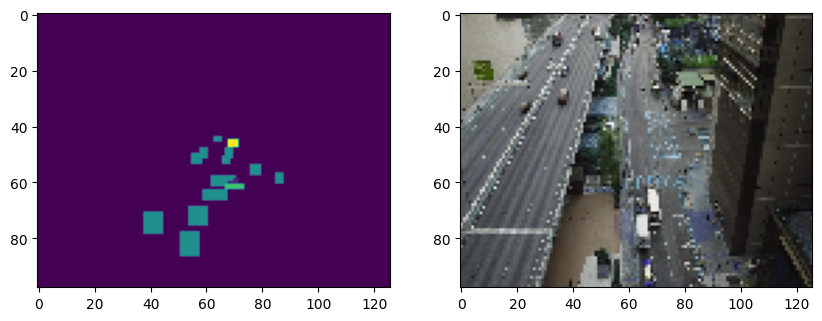

In [265]:
complete_img = cv2.imread(check_files[idx])
complete_img = cv2.resize(complete_img, (126, 98), interpolation=cv2.INTER_NEAREST_EXACT)

fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
axes[0].imshow(reconstructed_imgs[idx])
axes[1].imshow(complete_img);

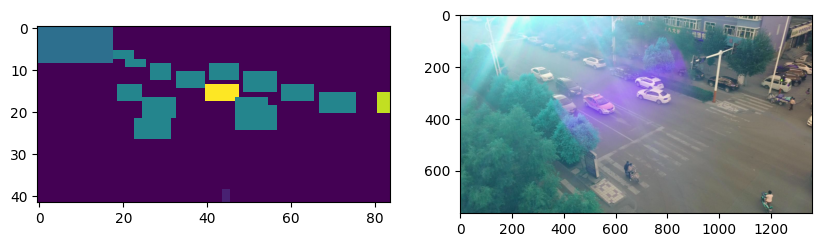

In [28]:
# idx = -1
complete_img = cv2.imread(save_json[idx]['file_name'])

fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)
axes[0].imshow(reconstructed_imgs[idx])
axes[1].imshow(complete_img);

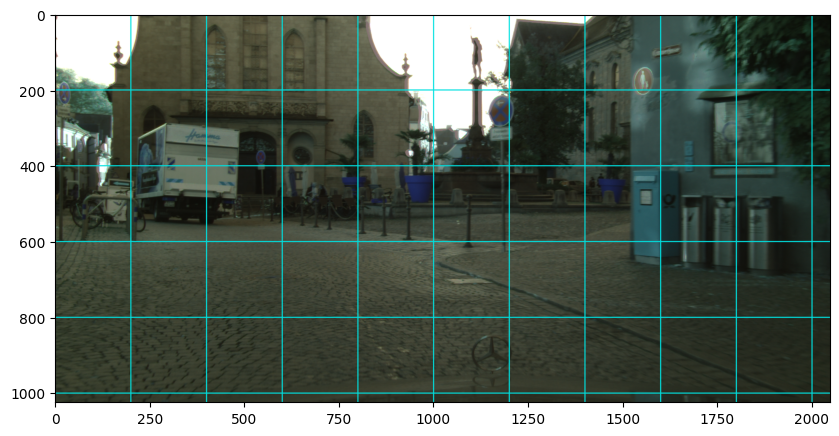

In [21]:
complete_img = cv2.imread(save_json[-1]['file_name'])
# img = (imgs[j].permute(1, 2, 0) * imagenet_std + imagenet_mean).clone().detach().numpy()
font = cv2.FONT_HERSHEY_SIMPLEX
plt.figure(figsize=(10, 10))
for i in range(0, 2048, 200):
    complete_img = cv2.line(complete_img, (i, 0), (i, 2048), (0, 225, 224), 2, 1)
    complete_img = cv2.line(complete_img, (0, i), (2048, i), (0, 225, 224), 2, 1)

plt.imshow(complete_img);

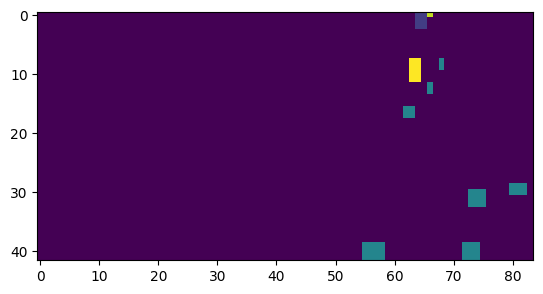

In [82]:
plt.imshow(reconstructed_imgs[5]);

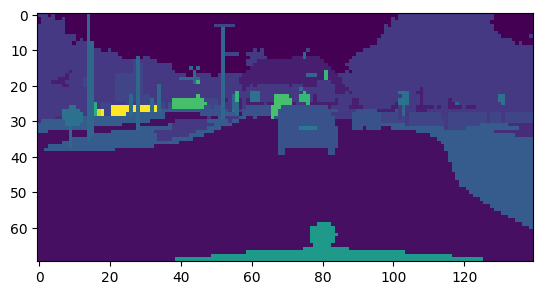

In [36]:
plt.imshow(reconstructed_imgs[-1]);

In [30]:
np.save('/home/hkhachatrian/mae/annotations/cs4pc_upsampled_train.npy', save_json)

In [194]:
train_cs = np.load('/home/hkhachatrian/mae/annotations/cs4pc_upsampled_train.npy', allow_pickle=True) #.item()

In [195]:
train_cs[0]

{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_011655_leftImg8bit.png',
 'id': 1,
 'patch_labels': array([[19.,  6.,  6., ..., 19., 19., 19.],
        [19.,  6.,  6., ..., 19., 19., 19.],
        [19.,  6.,  6., ...,  4.,  4.,  4.],
        ...,
        [ 2.,  2.,  2., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.],
        [19., 19., 19., ..., 18., 18., 18.]])}

In [196]:
cmplt_img = read_image(train_cs[0]['file_name'])

In [197]:
cmplt_img.shape

torch.Size([3, 1024, 2048])

In [198]:
img = train_cs[0]['patch_labels']

In [199]:
img.shape

(70, 140)

In [200]:
resized_img = cv2.resize(img, (2048, 1024))

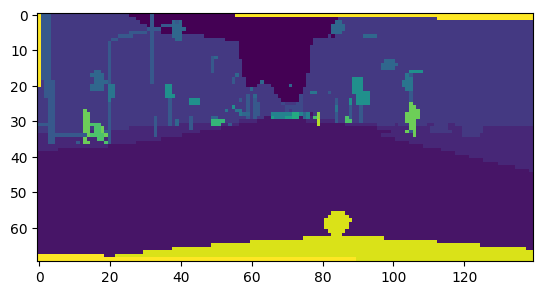

In [201]:
plt.imshow(img);

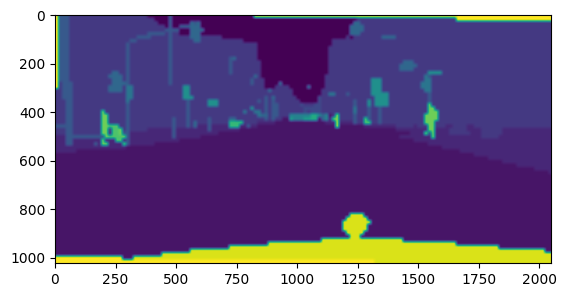

In [202]:
plt.imshow(resized_img);

In [176]:
img.shape

(70, 140)

In [38]:
save_json

[{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/munster/munster_000097_000019_leftImg8bit/.png',
  'id': 0,
  'patch_labels': array([[1., 1., 1., ..., 3., 3., 3.],
         [1., 1., 1., ..., 3., 3., 3.],
         [1., 1., 1., ..., 3., 3., 3.],
         ...,
         [2., 2., 2., ..., 4., 4., 4.],
         [2., 2., 2., ..., 4., 4., 4.],
         [2., 2., 2., ..., 4., 4., 4.]])},
 {'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/munster/munster_000161_000019_leftImg8bit/.png',
  'id': 1,
  'patch_labels': array([[5., 5., 5., ..., 3., 3., 3.],
         [5., 5., 5., ..., 3., 3., 3.],
         [5., 5., 5., ..., 3., 3., 3.],
         ...,
         [2., 2., 2., ..., 2., 2., 2.],
         [2., 2., 2., ..., 2., 2., 2.],
         [2., 2., 2., ..., 2., 2., 2.]])},
 {'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/munster/munster_000072_000019_leftImg8bit/.png',
  'id': 2,
  'patch_labels': array([[3., 3., 3., ..., 5., 5., 5.],
         [3., 3., 3., ..., 5., 5., 

In [90]:
max_j, max_i

(9, 5)

In [26]:
img = cv2.imread('/mnt/lwll/lwll-coral/hrant/cs4pc_200/train/krefeld_000000_011655_leftImg8bit.200_0_0.png')

In [50]:
complete_img = cv2.imread('/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_011655_leftImg8bit.png')

In [86]:
complete_img = cv2.imread('/lwll/development/vis_drone/vis_drone_full/train/9999998_00294_d_0000247.jpg')

In [88]:
complete_img.shape

(1500, 2000, 3)

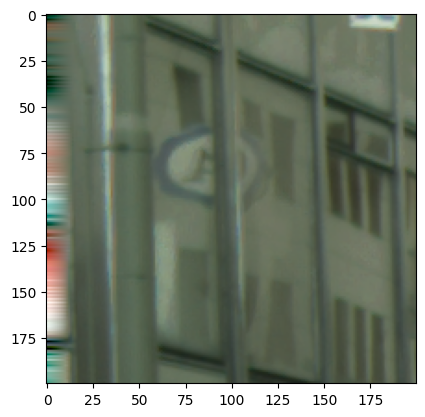

In [27]:
plt.imshow(img);

In [16]:
rec_image

TypeError: Image data of dtype object cannot be converted to float

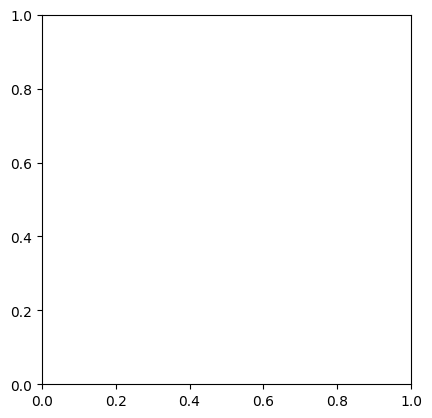

In [15]:
plt.imshow(rec_image)

In [73]:
patch_array = img['patch_labels']
patch_array

array([19,  6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,  6,  6,
        6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,  6,  6,  6,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4, 19,  6,  6,  6,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4, 19,  6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4, 19,  6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,
        6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,  6,  6,  6,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,  6,  6,  6,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4, 19,  6,  6,  6,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4, 19,  6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4, 19,  6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,  6,
        6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 19,  6,  6,  6,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4], dtype=uint8)

In [ ]:
np.concatenate([img['patch_labels'], img['patch_labels']], axis=1)

In [ ]:
patch_array

In [ ]:
plt.imshow(img['patch_labels'])

In [ ]:
b = np.array(1)

In [ ]:
c = np.concatenate(a, b)